# Observation Model Test

This notebook downloads an image and processes it with an observation model from the `transformers` library.

In [2]:
import requests
from PIL import Image
from transformers import AutoImageProcessor, AutoModel

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = AutoImageProcessor.from_pretrained(
    "apple/aimv2-large-patch14-224-distilled",
)
# model = AutoModel.from_pretrained(
#     "apple/aimv2-large-patch14-224-distilled",
#     trust_remote_code=True,
# )
inputs = processor(images=image, return_tensors="pt")
#outputs = model(**inputs)
#print(outputs.last_hidden_state.shape)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
outputs

BaseModelOutputWithNoAttention(last_hidden_state=tensor([[[ 1.8232e-02,  7.7321e-02, -1.1252e-03,  ...,  5.8520e-02,
          -1.0020e-02, -1.5339e-01],
         [-2.1975e-01, -6.1703e-01,  3.9219e-01,  ...,  3.7899e-01,
          -7.4715e-01,  6.1761e-01],
         [-1.3244e-01, -6.7917e-01,  3.3166e-01,  ...,  4.9691e-01,
          -9.0450e-01,  5.3850e-01],
         ...,
         [ 3.2951e-01,  4.0129e-01,  1.8065e-01,  ..., -1.0353e-02,
          -3.2542e-01,  1.5362e-01],
         [ 2.1748e-01,  3.9281e-01,  1.5903e-01,  ...,  8.2645e-01,
           2.3437e-01,  2.2746e-01],
         [ 6.1117e-01, -4.3759e-01,  5.6024e-01,  ..., -3.7935e-01,
           1.1796e+00, -6.0421e-01]]], grad_fn=<MulBackward0>), hidden_states=None)

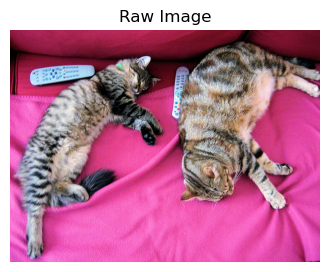

In [4]:
import matplotlib.pyplot as plt

# raw PIL image
plt.figure(figsize=(4,4))
plt.imshow(image)           # image is your PIL.Image
plt.axis('off')
plt.title("Raw Image")
plt.show()


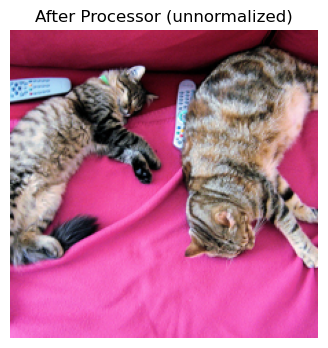

In [3]:
import torch
import matplotlib.pyplot as plt

# get the pixel values tensor: [1,3,224,224]
pixel_values = inputs["pixel_values"][0]

# the processor’s normalization stats
mean = torch.tensor(processor.image_mean)[:, None, None]
std  = torch.tensor(processor.image_std)[:, None, None]

# undo normalization
unnorm = pixel_values * std + mean            # still [3,224,224]
unnorm = unnorm.permute(1, 2, 0).clamp(0, 1)   # [224,224,3] in [0,1] range

plt.figure(figsize=(4,4))
plt.imshow(unnorm.numpy())
plt.axis('off')
plt.title("After Processor (unnormalized)")
plt.show()


In [4]:
std,mean

(tensor([[[0.2686]],
 
         [[0.2613]],
 
         [[0.2758]]]),
 tensor([[[0.4815]],
 
         [[0.4578]],
 
         [[0.4082]]]))

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

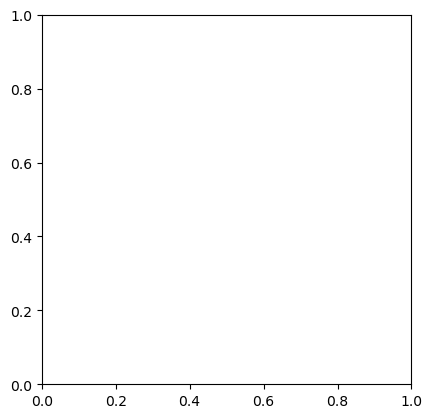

In [6]:
plt.imshow(outputs.last_hidden_state)


In [2]:
from dataset import EmbeddingH5Dataset

In [11]:
ds=EmbeddingH5Dataset("./scripts/something.h5",32,1)

In [14]:
ds[0][1]

tensor([-1.2503e+00,  1.4953e+00, -8.2530e-01, -3.3538e+00,  1.2426e+00,
        -1.2219e+00, -7.5381e-01, -2.3146e+00, -1.1110e+00,  1.2222e+00,
        -1.4995e+00,  7.9219e-01, -1.7351e+00, -2.0475e+00,  4.0127e-01,
        -8.2489e-03,  6.1823e-01, -1.2571e+00, -4.5658e+00,  1.1316e-01,
        -1.3854e+00,  5.0022e-02,  3.9611e+00,  1.4590e+00,  1.8806e+00,
         2.1096e-01,  7.3117e-01, -7.0883e-01,  7.7425e-01, -1.1257e+00,
        -1.0180e+00,  5.1135e-01,  4.1988e+00,  8.8543e-01,  7.6073e-01,
         4.3128e-01,  5.0450e-01,  6.5528e-01, -2.9752e+00, -1.8589e+00,
         2.0281e+00,  1.5002e+00, -2.3227e+00,  7.8588e-01, -1.9232e+00,
         2.4708e-01,  1.5411e+00,  1.3535e+00,  1.6834e+00,  5.6562e-01,
        -2.0277e+00,  1.7698e+00,  2.1637e+00,  2.2502e+00, -3.6361e+00,
        -9.2511e-02, -1.3830e+00,  1.7131e+00, -1.2943e+00,  3.2537e-01,
         2.3996e+00, -1.5625e+00, -3.4373e-02,  1.3725e+00, -3.7991e-01,
         1.7820e+00,  9.9521e-01,  8.8812e-02,  1.1